In [31]:
versioninfo()

Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 8 × Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 1 on 8 virtual cores
Environment:
  JULIA_NUM_THREADS = 


In [32]:
Sys.total_memory() / 2^20

7820.04296875

In [33]:
Sys.free_memory() / 2^20

3314.89453125

In [34]:
using DataFrames
using DelimitedFiles
using Distributed
using Interpolations
using LaTeXStrings
using LinearAlgebra
using NBInclude
using Plots
using ProgressBars
using ProgressMeter
using SparseArrays

In [35]:
@nbinclude("Hofstadter Single Particle in Julia.ipynb")
@nbinclude("../First Band Approximation Functions (Use jl version).ipynb")
@nbinclude("../Braiding Utils.ipynb")
@nbinclude("../Aharonov-Bohm Phase.ipynb")
@nbinclude("../Hofstadter Many Body Utils.ipynb");

# Parameters and Impurity Control

In [36]:
Nx=8
Ny=10
p=1
q=10
par_num = 3
U = 5; # On site interaction 

In [37]:
NPhi = Int( Nx * Ny * (p/q) )
cut_off = NPhi
PN = [i for i in 0:par_num];

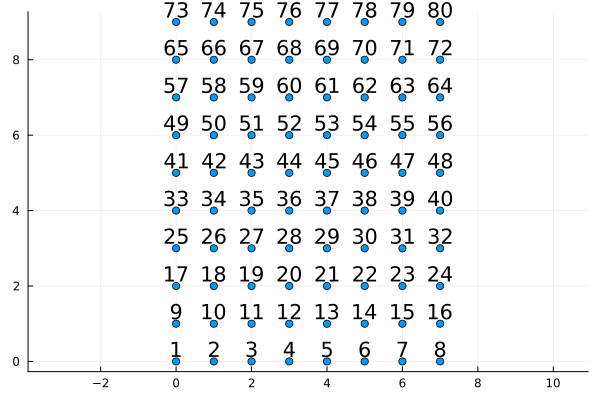

([0 0; 1 0; … ; 6 9; 7 9], nothing)

In [38]:
co, _ = plot_square_lattice(Nx, Ny)

In [39]:
# IMPURITY DATA
V_Strength = 10
V0 = [V_Strength,V_Strength]
# For 1 qh moving choose corner of the path 
Imp_Site = [19,63]
#Imp_Site = [25, 97]; # 6x6
#Imp_Site = [32, 137]; #7x7

2-element Vector{Int64}:
 19
 63

In [40]:
N_Pin = length(V0[V0 .> 0]) # Number of pinning quasihole
Impurity_Data = Impurity(V0, Imp_Site)
N_Pin

2

# Paths

In [41]:
# MOVING QUASIHOLES
start_point_1 = Impurity_Data.Imp_Site[1]
lens_1 = [4,5,4,5]
dirs_1 = [1, Nx, -1, -Nx]
rec_path_exch_1 = rectangular_path(start_point_1,lens_1,dirs_1)

start_point_2 = Impurity_Data.Imp_Site[2]
lens_2 = lens_1
dirs_2 = [-1, -Nx, 1, Nx]
rec_path_exch_2 = rectangular_path(start_point_2,lens_2,dirs_2)

19-element Vector{Int64}:
 63
 62
 61
 60
 59
 51
 43
 35
 27
 19
 20
 21
 22
 23
 31
 39
 47
 55
 63

In [42]:
# # Write the path manuelly if you calculate the AB phase with N_pin=1
# rec_path_exch_1 = [7,8,9,14,19,24,4,9,8,7,2,22,17,12,7]
# rec_path_exch_2 = rec_path_exch_1 

In [43]:
# STEP CONTROL
delta_t = 0.005
STEP = 0:delta_t:1
println("Step size for braiding: ",length(STEP))

Step size for braiding: 201


# Many-Body Spectrum

In [44]:
Degeneracy, pn, NPhi0, N_d = ground_degeneracy(Nx, Ny, p, q, N_Pin, PN)

(2, 3, 8.0, 0)

In [45]:
?Get_MB

ErrorException: syntax: invalid identifier name "?"

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


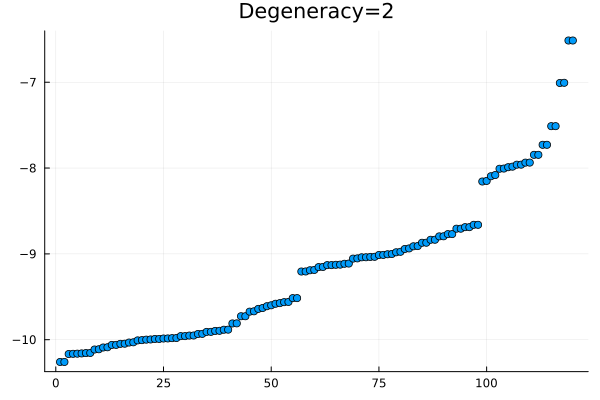

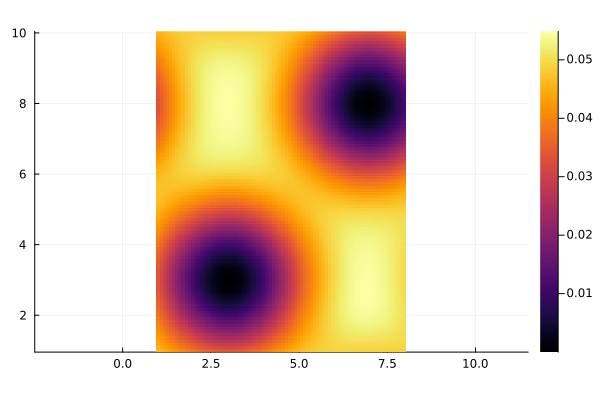

In [46]:
factor = 10; # particle density interpolation factor
E, Sub_Number_MB_Operator_List, basis_cut_mb, Degeneracy, Total_H, Sub_Number_MB_Operator_List, r_hubbard_states, pn, NPhi0, H1 = Get_MB(Nx, Ny, p, q, cut_off, PN, U, Impurity_Data, factor, N_Pin);

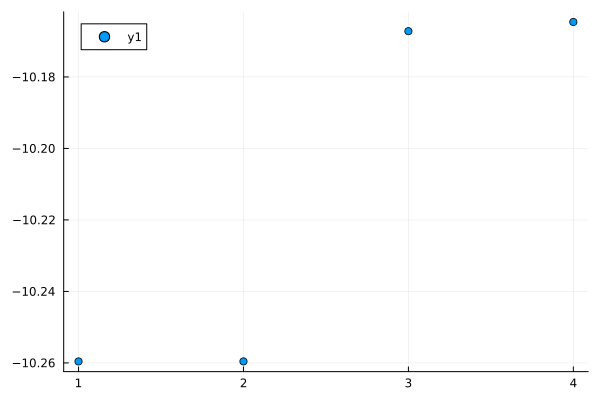

In [47]:
scatter(E[1:Degeneracy*2])

In [48]:
E

120-element Vector{Float64}:
 -10.259588699347272
 -10.259580531731165
 -10.16719606363122
 -10.164625537753697
 -10.162930638340788
 -10.159960029779729
 -10.155828114791754
 -10.154454557036082
 -10.114515628705515
 -10.111421749277861
   ⋮
  -7.84597305410926
  -7.729176715737923
  -7.7291655987710985
  -7.511873785469757
  -7.511872198095524
  -7.008972074834516
  -7.006617271782273
  -6.513884114595559
  -6.513883745203871

In [49]:
R = 2.5
pi*R^2*0.05

0.9817477042468105

In [50]:
par_num/(Nx*Ny)

0.0375

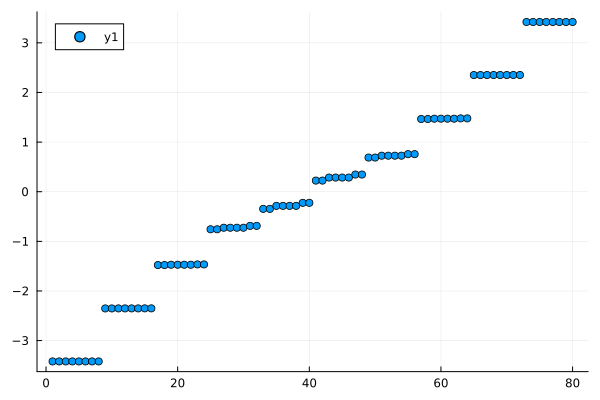

In [52]:
E_sp, U_sp = eigenstates(dense(H1))
scatter(E_sp)

In [53]:
E_sp

80-element Vector{Float64}:
 -3.4200536414081673
 -3.420053641408162
 -3.420015300472139
 -3.4200153004721385
 -3.4200153004721345
 -3.4200153004721345
 -3.4199769502011845
 -3.41997695020118
 -2.3523028233743304
 -2.3523028233743277
  ⋮
  2.3523028233743304
  3.4199769502011854
  3.4199769502011854
  3.420015300472138
  3.4200153004721385
  3.4200153004721394
  3.4200153004721394
  3.420053641408168
  3.420053641408168

In [54]:
 -3.0955735647785816 * 3

-9.286720694335745

In [55]:
E[1:Degeneracy*2]
writedlm("2.  Eigenvalues.txt",E[1:Degeneracy+1])

# $\Phi_{AB}$

In [353]:
N_mov = 1
number_of_plaq = 4*5
θ_AB, ex, charge = th_AB_phase(pn, p, q, N_Pin, N_mov, number_of_plaq)

(1.0, 1.0 - 2.4492935982947064e-16im, 0.5)

# Phases

In [56]:
# =1 for N_p = 1 or Closed Path
# =2 for x2 Exchange 
# =3 for Braiding
# =4 for Manuel
Path_Type  = 2
rec_path_1, rec_path_2 = chose_path(Path_Type, rec_path_exch_1, rec_path_exch_2, Imp_Site, Nx, Ny, co);

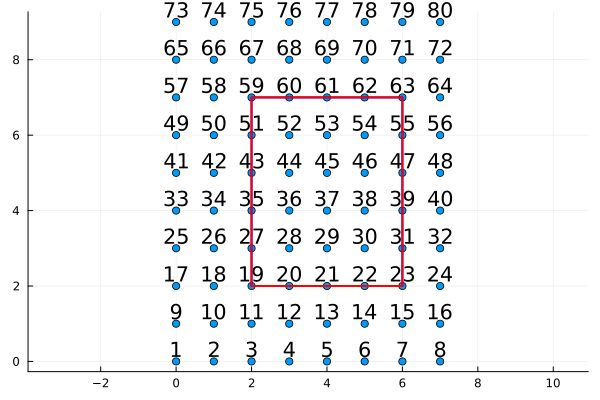

In [58]:
plot_paths(co, rec_path_1, rec_path_2)

In [59]:
@nbinclude("../Hofstadter Many Body Utils.ipynb");

In [60]:
ψ, ψ_first, Ψ_list, ϕ_tot, BerryEnergies = get_phases(Impurity_Data,rec_path_1,rec_path_2, Imp_Site, Total_H, Sub_Number_MB_Operator_List, Degeneracy);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


In [62]:
ϕ_tot

-2.663745959918808e-13

In [63]:
BerryEnergies;

In [64]:
#((ψ' * ψ_first)' - (ψ' * ψ_first)); # Nearly equal unitar matrix

In [65]:
All_Phases = []
for i in 1:length(BerryEnergies)
    push!(All_Phases,imag(log(BerryEnergies[i])/(2*pi)))
end
round.(All_Phases,digits=7)

2-element Vector{Float64}:
  0.4779016
 -0.4779016

In [144]:
writedlm("2. Phases.txt",All_Phases)

In [145]:
sum(All_Phases)
# N_p = 2 ama N_mov = 1 iken tam sayı değil ! (Onur hocanın paylaştığı dosyada α*N_eu tam sayı olursa, toplamları da tam sayıdır!)

-0.7999999999999811

In [146]:
θ_AB

0.4

In [147]:
ν_eff = charge

0.5

In [14]:
# D = Degeneracy
D = 9
# ν_EFF = ν_eff
ν_EFF = 2*(4/9)
# AB = θ_AB
AB = 2.2222222222223
# SuM_P = sum(All_Phases)
SuM_P = 0.024599828709550197

0.024599828709550197

In [15]:
X = abs(SuM_P - D*AB - D*ν_EFF )
(X - floor(X))/(D*ν_EFF)

0.12192502141139361

In [27]:
tol = 10^(-1)
for i in -200:200
    global Z
    # Z = (((SuM_P+i)/D) - AB) 
    Z = (SuM_P+i - AB) / D
    if abs(Z-ν_EFF) < tol
        println(i, "\t", Z)
    end
    global B
    # B = (((SuM_P+i)/D) + AB) 
    B = (SuM_P+i + AB) / D 
    if abs(B-ν_EFF) < tol
        j = i
        println(j, "\t", B)
    end
end

5	0.805202450103539
6	0.91631356121465
10	0.8669308451652502
11	0.9780419562763613


In [96]:
(ν_EFF - 0.3290642163313662) / ν_EFF

-0.3162568653254647

In [97]:
NNN = 4
for N_PHI in 2*NNN:5*NNN
    NU = NNN/(N_PHI-2)
    println(rationalize(NU),"\t",N_PHI)
end

2//3	8
4//7	9
1//2	10
4//9	11
2//5	12
4//11	13
1//3	14
4//13	15
2//7	16
4//15	17
1//4	18
4//17	19
2//9	20


In [98]:
# for LaTeX
print("(",Nx,",",Ny,") & ", p//q, " & ", NPhi, " & ", pn, " & ", N_d, " & ", N_Pin, " & ", pn//(NPhi-N_Pin), " & ",number_of_plaq, " & " ,θ_AB, " & ", Degeneracy, " & ", sum(All_Phases))
#println(" Nx= ",Nx," Ny= ", Ny, " alpha=", p//q, " N_phi= ", NPhi, " PN= ", par_num, " N_pin ", N_Pin, " N_eu=", lens_1[1], "x", lens_1[2])

(14,14) & 1//14 & 14 & 3 & 6 & 2 & 1//4 & 49 & 1.75 & 112 & -4.999999999999913

# Theoric vs Numeric AB

In [114]:
# FOR XXX TABLE
N_euu = 4

# FOR XXXX TABLE
N_euu = 2

# FOR XXXX TABLE
N_euu = 4

N_mov*(p/q)*charge*N_euu #AB (N_eu=2)

0.4

In [97]:
# Berry variable is numerical result
((-Berry/N_euu)*(Nx*Ny)) #Theoric \Phi value from Tables

4.898319523031905

In [ ]:
2/7 # Berry phase from Table XX

In [44]:
-(2/7)-(3.8571428571428568)

-4.142857142857142

In [45]:
-0.142857142857142+1 # Q (Charge) or braiding phase we expected from table XX

0.857142857142858

In [51]:
(1 * (1/10) * (3/8) * 10 * 10) # Teorik AB

3.7500000000000004

In [55]:
(2/16)-3.7500000000000004

-3.6250000000000004

In [56]:
-0.6250000000000004+1

0.37499999999999956

# Movie of QH's

In [56]:
length(Ψ_list)

2020

In [ ]:
data = Get_Avg_Density(10, 10, Degeneracy,10*10, Sub_Number_MB_Operator_List, basis_cut_mb, Ψ_list[100])'
heatmap(Interp(data, 100), aspect_ratio=:equal)

In [ ]:
@gif for i in 1:300
    data = Get_Avg_Density(10, 10, Degeneracy, 10*10, Sub_Number_MB_Operator_List, basis_cut_mb, Ψ_list[i])'
    heatmap(Interp(data, 20), aspect_ratio=:equal)
end